<h1 align="center">Naive Bayes and Bayes Classifier for Prima Indian Dataset<h1>

## First we import the libraries required for our analysis

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import math
from math import pi

## Now we will load the dataset and view the first few rows to get an idea of what we are exploring

In [37]:
file_path=".\\diabetes.csv"
FileData=pd.read_csv(file_path,sep=",",engine="python")
FileData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Note: In this notebook we will first explore the data loaded from the prima indian dataset and after the analysis we will load the randomized dataset uploaded on beach board and analyze it and then train our model on the uploaded dataset

## Now let's plot the dataset values to gain some insight on the feature. In this case our columns

### Now we will plot the features to get an insight about it's values. First we will plot Pregnancy Vs Age & Glucose Vs Insulin

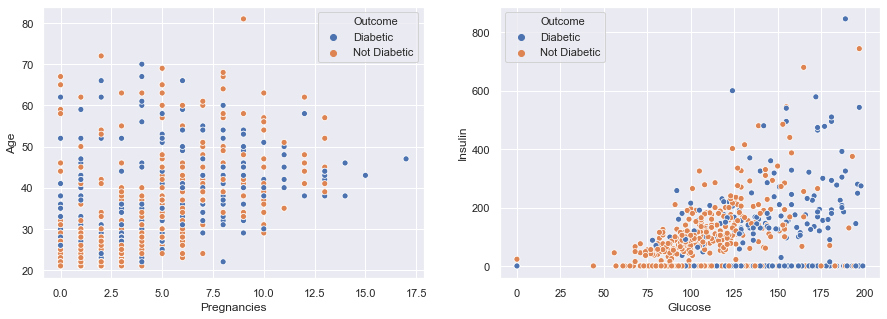

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1,)
plot_data=pd.DataFrame()
plot_data["Pregnancies"]=FileData["Pregnancies"]
plot_data["Age"]=FileData["Age"]
plot_data["Outcome"]=FileData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
ax = sns.scatterplot(x="Pregnancies", y="Age", hue="Outcome",data=plot_data)
plt.subplot(1,2,2)
plot_data=pd.DataFrame()
plot_data["Glucose"]=FileData["Glucose"]
plot_data["Insulin"]=FileData["Insulin"]
plot_data["Outcome"]=FileData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
bx = sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome",data=plot_data)

### Now we will plot BMI Vs Skin Thickness & Age Vs Blood Pressure

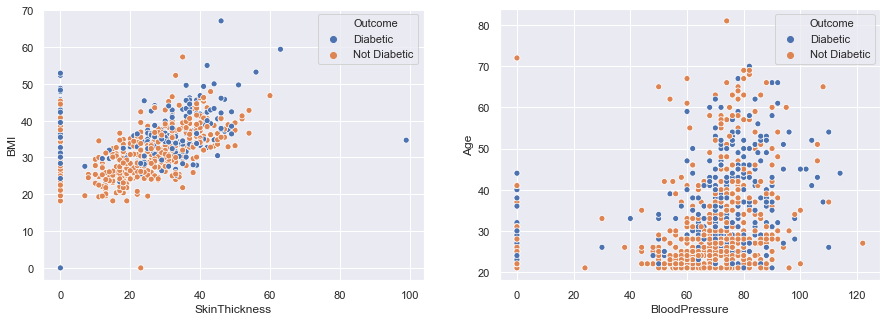

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1,)
plot_data=pd.DataFrame()
plot_data["SkinThickness"]=FileData["SkinThickness"]
plot_data["BMI"]=FileData["BMI"]
plot_data["Outcome"]=FileData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
ax = sns.scatterplot(x="SkinThickness", y="BMI", hue="Outcome",data=plot_data)
plt.subplot(1,2,2)
plot_data=pd.DataFrame()
plot_data["BloodPressure"]=FileData["BloodPressure"]
plot_data["Age"]=FileData["Age"]
plot_data["Outcome"]=FileData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
ax = sns.scatterplot(x="BloodPressure", y="Age", hue="Outcome",data=plot_data)

### Now we finally plot the Diabetes Pedigree Function Vs the Age

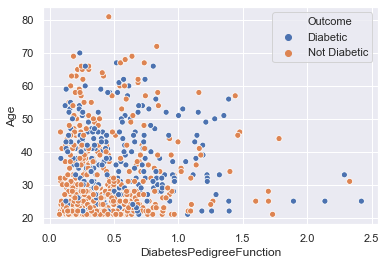

In [40]:
plot_data=pd.DataFrame()
plot_data["DiabetesPedigreeFunction"]=FileData["DiabetesPedigreeFunction"]
plot_data["Age"]=FileData["Age"]
plot_data["Outcome"]=FileData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
ax = sns.scatterplot(x="DiabetesPedigreeFunction", y="Age", hue="Outcome",data=plot_data)

## Now let's load the data set uploaded on the Beach-Board and Plot the Same:

In [41]:
file_path=".\\train.csv"
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
TrainData=pd.read_csv(file_path,sep=",",engine="python",names=columns)
print("Number of Records in Train Data : ", len(TrainData))
TrainData.head()

Number of Records in Train Data :  514


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10.0,108.0,66.0,0.0,0.0,32.4,0.272,42.0,1.0
1,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0,0.0
2,2.0,115.0,64.0,22.0,0.0,30.8,0.421,21.0,0.0
3,1.0,95.0,66.0,13.0,38.0,19.6,0.334,25.0,0.0
4,4.0,94.0,65.0,22.0,0.0,24.7,0.148,21.0,0.0


## Now let's plot the train dataset values

### Pregnancy Vs Age & Glucose Vs Insulin

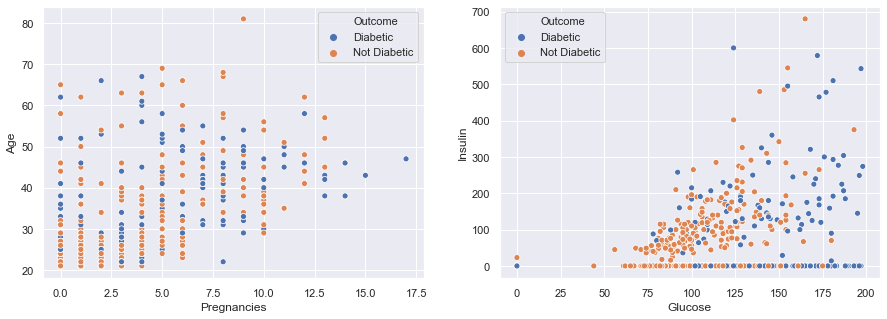

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1,)
plot_data=pd.DataFrame()
plot_data["Pregnancies"]=TrainData["Pregnancies"]
plot_data["Age"]=TrainData["Age"]
plot_data["Outcome"]=TrainData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
ax = sns.scatterplot(x="Pregnancies", y="Age", hue="Outcome",data=plot_data)
plt.subplot(1,2,2)
plot_data=pd.DataFrame()
plot_data["Glucose"]=TrainData["Glucose"]
plot_data["Insulin"]=TrainData["Insulin"]
plot_data["Outcome"]=TrainData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
bx = sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome",data=plot_data)

### BMI Vs Skin Thickness & Age Vs Blood Pressure

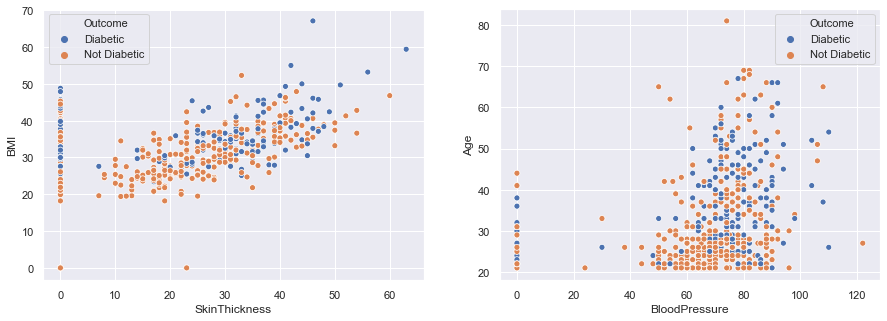

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1,)
plot_data=pd.DataFrame()
plot_data["SkinThickness"]=TrainData["SkinThickness"]
plot_data["BMI"]=TrainData["BMI"]
plot_data["Outcome"]=TrainData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
ax = sns.scatterplot(x="SkinThickness", y="BMI", hue="Outcome",data=plot_data)
plt.subplot(1,2,2)
plot_data=pd.DataFrame()
plot_data["BloodPressure"]=TrainData["BloodPressure"]
plot_data["Age"]=TrainData["Age"]
plot_data["Outcome"]=TrainData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
ax = sns.scatterplot(x="BloodPressure", y="Age", hue="Outcome",data=plot_data)

### Diabetes Pedigree Function Vs the Age

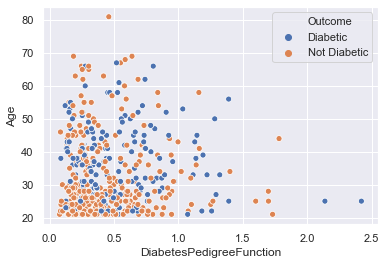

In [44]:
plot_data=pd.DataFrame()
plot_data["DiabetesPedigreeFunction"]=TrainData["DiabetesPedigreeFunction"]
plot_data["Age"]=TrainData["Age"]
plot_data["Outcome"]=TrainData["Outcome"]
plot_data["Outcome"]=plot_data["Outcome"].replace(0,"Not Diabetic")
plot_data["Outcome"]=plot_data["Outcome"].replace(1,"Diabetic")
ax = sns.scatterplot(x="DiabetesPedigreeFunction", y="Age", hue="Outcome",data=plot_data)

## Now Let's see the number of zero filled entries in each column

In [45]:
columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age",]
def checkIsZero(column_name):
    cnt=0
    for i in TrainData.itertuples():
        r=i._asdict()
        if r[column_name] == 0:
            cnt+=1
    print("nuber of zeroes in ",column_name,"=",cnt)
for i in columns:
    checkIsZero(i)

nuber of zeroes in  Pregnancies = 82
nuber of zeroes in  Glucose = 4
nuber of zeroes in  BloodPressure = 20
nuber of zeroes in  SkinThickness = 161
nuber of zeroes in  Insulin = 261
nuber of zeroes in  BMI = 9
nuber of zeroes in  DiabetesPedigreeFunction = 0
nuber of zeroes in  Age = 0


# Now we can observe from the plots that the feature Pregnancies, Blood Pressure, Skin Thickness and Insulin columns have a lot of zero values. We obeserve that the SkinThickness column has more zeroes and so does Insulin. This Will affect the accuracy of our model. 

## Next we will fill the zero filled entries of these columns with the standard deviation of the respective columns. But we will leave the Pregnancy column unalterted.

In [46]:
TrainData["Insulin"]=TrainData["Insulin"].replace(0,np.nan)
dev=TrainData["Insulin"].std()
TrainData["Insulin"]=TrainData["Insulin"].replace(np.nan,dev)

TrainData["SkinThickness"]=TrainData["SkinThickness"].replace(0,np.nan)
dev=TrainData["SkinThickness"].std()
TrainData["SkinThickness"]=TrainData["SkinThickness"].replace(np.nan,dev)

## Before we start off with the classification let's load our test data

In [47]:
file_path=".\\test.csv"
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
TestData=pd.read_csv(file_path,sep=",",engine="python",names=columns)
print("Number of Records in Train Data : ", len(TestData))
TestData.head()

TestData["Insulin"]=TestData["Insulin"].replace(0,np.nan)
dev=TestData["Insulin"].std()
TestData["Insulin"]=TestData["Insulin"].replace(np.nan,dev)

TestData["SkinThickness"]=TestData["SkinThickness"].replace(0,np.nan)
dev=TestData["SkinThickness"].std()
TestData["SkinThickness"]=TestData["SkinThickness"].replace(np.nan,dev)

Number of Records in Train Data :  254


## Now let's divide our test data into the features and the outcome arrays

In [48]:
y_test=TestData
y_actualOutcome=y_test["Outcome"].values

# Naive Bayes Classifier:

## Mean and Variance Function:

In [49]:
def mean_function():
    return (TrainData.groupby(TrainData["Outcome"]==1,as_index=False).mean())
means=mean_function()

In [50]:
means

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.241176,109.273529,68.582353,22.697578,119.106082,30.386765,0.431753,31.085294,0.0
1,4.908046,141.574713,71.839080,24.697438,152.309637,35.211494,0.548023,36.729885,1.0


In [51]:
def variance_function():
    return (TrainData.groupby(TrainData["Outcome"]==1,as_index=False).var())
variances=variance_function()

In [52]:
variances

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.351692,687.33794,304.592018,133.853137,4899.640009,65.068703,0.085064,134.019252,0.0
1,15.066640,988.56953,417.072221,182.809348,9001.325064,54.607266,0.131740,121.701183,0.0


In [53]:
def Calc_Prob_FromDistribution(value,column_name,outcome):
    return (1/math.sqrt(2*pi*variances[column_name][outcome]))*math.exp(-0.5*pow((value-means[column_name][outcome]),2)/(variances[column_name][outcome]))

## Now let's calculate the total probablility of diabetic or not_diabetic in our train dataset

In [54]:
probDiabeticTrain = TrainData[TrainData.Outcome==1].shape[0]/len(TrainData["Outcome"])
probNotDiabeticTrain = TrainData[TrainData.Outcome==0].shape[0]/len(TrainData["Outcome"])

# Now let's build our classifier

## Naive Bayes Classifier

In [55]:
def classifier(y_test,probDiabeticTrain,probNotDiabeticTrain):
    columns=list(y_test.columns)
    columns.remove('Outcome')
    prob_diabetic=probDiabeticTrain
    prob_notdiabetic=probNotDiabeticTrain
    for row in y_test.itertuples():
        row_dict=row._asdict()
        for col in columns:
            prob_diabetic*=Calc_Prob_FromDistribution(row_dict[col],col,1)
            prob_notdiabetic*=Calc_Prob_FromDistribution(row_dict[col],col,0)
        predicted.append(1) if prob_diabetic>prob_notdiabetic else predicted.append(0)
        prob_diabetic=probDiabeticTrain
        prob_notdiabetic=probNotDiabeticTrain

### Now let's call our classifier on the test dataset

In [56]:
predicted=[]            
classifier(y_test,probDiabeticTrain,probNotDiabeticTrain)

In [57]:
print(predicted)

[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0]


254 		Predicted:0	Predicted:1
Actual:0	 TN= 131 	 FP= 29 	 160
Actual:1	 FN= 37 	 TP= 57 	 94
		 168 		 86


Accuracy =  0.7401574803149606
Error =  0.25984251968503935
Sensitivity =  0.6063829787234043
Specificity =  0.81875


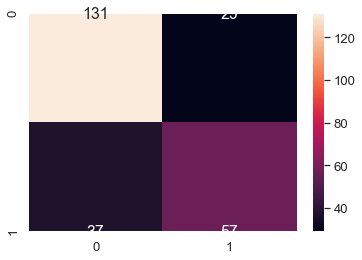

In [58]:
TP=TN=FP=FN=0

for i in range(0,len(y_actualOutcome)):
    if predicted[i]==y_actualOutcome[i]==1:
        TP+=1
    elif predicted[i]==y_actualOutcome[i]==0:
        TN+=1
    elif predicted[i]==1 and y_actualOutcome[i]==0:
        FP+=1
    elif predicted[i]==0 and y_actualOutcome[i]==1:
        FN+=1

print(len(predicted),"\t\tPredicted:0\tPredicted:1")
print("Actual:0\t","TN=",TN,"\t","FP=",FP,"\t",TN+FP)
print("Actual:1\t","FN=",FN,"\t","TP=",TP,"\t",FN+TP)
print("\t\t",TN+FN,"\t\t",FP+TP)

arr = [[TN,FP],[FN,TP]]
conf_matr = pd.DataFrame(arr, range(2), range(2))
sns.set(font_scale=1.2)
sns.heatmap(conf_matr, annot=True, annot_kws={"size": 16},fmt='g')

Accuracy = (TP + TN) / (TP + FP + TN +FN)
Error = (FP + FN) / (TP + FP + TN +FN)
Sensitivity = TP / (FN + TP) 
Specificity = TN / (TN + FP) 

print("\n\nAccuracy = ",Accuracy)
print("Error = ",Error)
print("Sensitivity = ",Sensitivity)
print("Specificity = ",Specificity)

### Sensitivity is the measure of the proportion of actual positive results which are predicted correctly
### Here we have a sensitivity of 0.606 which is pretty average.
### Specifity is the measure of the proportion of actual negative results which are predicted correctly
### Here we have a specifity of 0.81 which is pretty imprressive and satisfactory.

## From the Sensitivity and Specifity that we have inferred, we can say that our model is good at classifying if the patient is not diabetic rather than if the person is diabetic.
## Thus the confidence in the prediction of NOT DIABTEIC result is more than in the case of predicting if the person is DIABETIC.

# Now We Build The Simple Bayes Classifier:

## We Know that the bayes classifier will need the mean and variance of the columns both classwise and also for the entire column. So we will reuse the classwise mean and variance that we have defined previously.

In [59]:
def mean_function_OutcomeDependent():
    return (TrainData.groupby(TrainData["Outcome"]==1,as_index=False).mean())

means=mean_function_OutcomeDependent()

def variance_function_OutcomeDependent():
    return (TrainData.groupby(TrainData["Outcome"]==1,as_index=False).var())

variances=variance_function_OutcomeDependent()

In [60]:
means

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.241176,109.273529,68.582353,22.697578,119.106082,30.386765,0.431753,31.085294,0.0
1,4.908046,141.574713,71.839080,24.697438,152.309637,35.211494,0.548023,36.729885,1.0


In [61]:
variances

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.351692,687.33794,304.592018,133.853137,4899.640009,65.068703,0.085064,134.019252,0.0
1,15.066640,988.56953,417.072221,182.809348,9001.325064,54.607266,0.131740,121.701183,0.0


In [62]:
def mean_for_column(column_name):
    return (TrainData[column_name].mean())

def variance_for_column(column_name):
    return (TrainData[column_name].var())

## Now we define the normal distribution function again for our Simple Bayes Classifier:

In [63]:
def Calculate_Probability_FromDistributionFunction_Bayes(value,column_name):
    column_mean=mean_for_column(column_name)
    column_variance=variance_for_column(column_name)
    return (1/math.sqrt(2*pi*column_variance))*math.exp(-0.5*pow((value-column_mean),2)/(column_variance))

## Also we will need to calculate the probabilities from distribution classwise. So let's use the one which we have defined for the naive bayes classifier

In [64]:
def Calc_Prob_FromDistribution(value,column_name,outcome):
    return (1/math.sqrt(2*pi*variances[column_name][outcome]))*math.exp(-0.5*pow((value-means[column_name][outcome]),2)/(variances[column_name][outcome]))

### Now let's define the predicted result array

In [65]:
predicted_bayes=[]

## Now let's calculate the total probablility of diabetic or not_diabetic in our train dataset

In [66]:
probDiabeticTrain = TrainData[TrainData.Outcome==1].shape[0]/len(TrainData["Outcome"])
probNotDiabeticTrain = TrainData[TrainData.Outcome==0].shape[0]/len(TrainData["Outcome"])

## Bayes Classifier:

In [67]:
def classifier(y_test,probDiabeticTrain,probNotDiabeticTrain):
    columns=list(y_test.columns)
    columns.remove('Outcome')
    for row in y_test.itertuples():
        prob_diabetic=1
        prob_notdiabetic=1
        row_dict=row._asdict()
        for col in columns:
            prob_diabetic*=(Calc_Prob_FromDistribution(row_dict[col],col,1) * probDiabeticTrain) / (Calculate_Probability_FromDistributionFunction_Bayes(row_dict[col],col))
            prob_notdiabetic*=(Calc_Prob_FromDistribution(row_dict[col],col,0) * probNotDiabeticTrain) / (Calculate_Probability_FromDistributionFunction_Bayes(row_dict[col],col))
        predicted_bayes.append(1) if prob_diabetic>prob_notdiabetic else predicted_bayes.append(0)

In [68]:
classifier(y_test,probDiabeticTrain,probNotDiabeticTrain)

In [69]:
print(predicted_bayes)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


254 		Predicted:0	Predicted:1
Actual:0	 TN= 156 	 FP= 4 		 160
Actual:1	 FN= 78 	 TP= 16 	 94
		 234 		 20


Accuracy =  0.6771653543307087
Error =  0.3228346456692913
Sensitivity =  0.1702127659574468
Specificity =  0.975


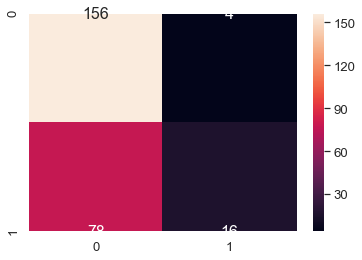

In [70]:
TP=TN=FP=FN=0

for i in range(0,len(y_actualOutcome)):
    if predicted_bayes[i]==y_actualOutcome[i]==1:
        TP+=1
    elif predicted_bayes[i]==y_actualOutcome[i]==0:
        TN+=1
    elif predicted_bayes[i]==1 and y_actualOutcome[i]==0:
        FP+=1
    elif predicted_bayes[i]==0 and y_actualOutcome[i]==1:
        FN+=1

print(len(predicted),"\t\tPredicted:0\tPredicted:1")
print("Actual:0\t","TN=",TN,"\t","FP=",FP,"\t\t",TN+FP)
print("Actual:1\t","FN=",FN,"\t","TP=",TP,"\t",FN+TP)
print("\t\t",TN+FN,"\t\t",FP+TP)

arr = [[TN,FP],[FN,TP]]
conf_matr = pd.DataFrame(arr, range(2), range(2))
sns.set(font_scale=1.2)
sns.heatmap(conf_matr, annot=True, annot_kws={"size": 16},fmt='g')

Accuracy = (TP + TN) / (TP + FP + TN +FN)
Error = (FP + FN) / (TP + FP + TN +FN)
Sensitivity = TP / (FN + TP) 
Specificity = TN / (TN + FP) 

print("\n\nAccuracy = ",Accuracy)
print("Error = ",Error)
print("Sensitivity = ",Sensitivity)
print("Specificity = ",Specificity)

### Sensitivity is the measure of the proportion of actual positive results which are predicted correctly
### Here we have a sensitivity of 0.17 which is pretty average.
### Specifity is the measure of the proportion of actual negative results which are predicted correctly
### Here we have a specifity of 0.975 which is really good.

## From the Sensitivity and Specifity that we have inferred, we can say that our model is good at classifying if the patient is not diabetic rather than if the person is diabetic.
## Thus the confidence in the prediction of NOT DIABTEIC result is more than in the case of predicting if the person is DIABETIC.

# INFERENCE (Naive Bayes V/S Bayes)

## Thus, based on the accuracy of the model we can say that the Naive Bayes is much more efficient in the classification than the Simple Bayes Model. Also, based on the sensitivity and specifity of the Naive Bayes and Simple Bayes model we can say that the Naive Bayes is better in predicting the positive cases of the diabetes while the Simple Bayes is better in prediciting the negative Diabetes cases. 

## References:

### 1. For understanding of how to handle data and standardizing the values: https://www.kaggle.com/baiazid/pima-indians-diabetes-na-ve-bayes


### 2. A Review on how Naive Bayes Works: https://www.youtube.com/watch?v=27X1sHtA5RQ

## Thank You